# Campus Placement Status Prediction using Mixed Naive Bayes

## Importing Liibraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Machine Learning\Projects\Placement_Data.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis

In [4]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

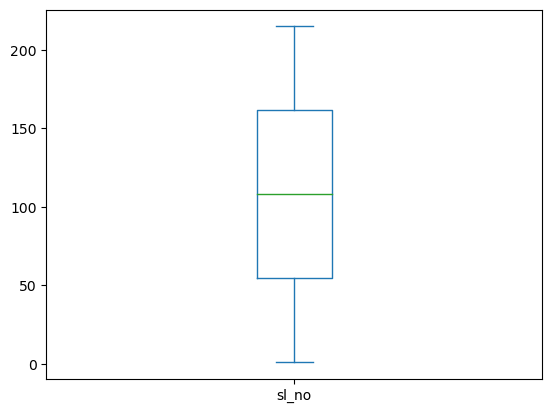

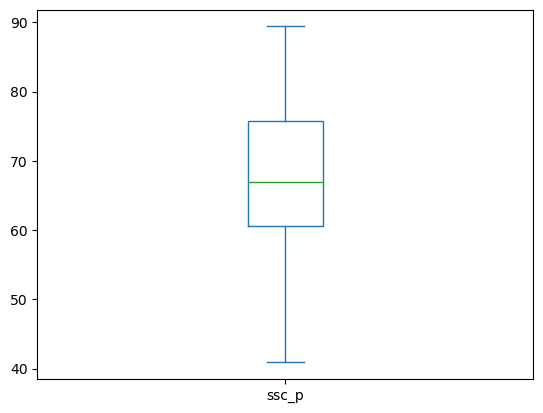

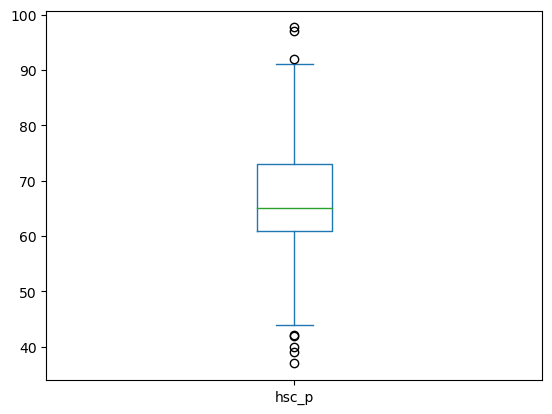

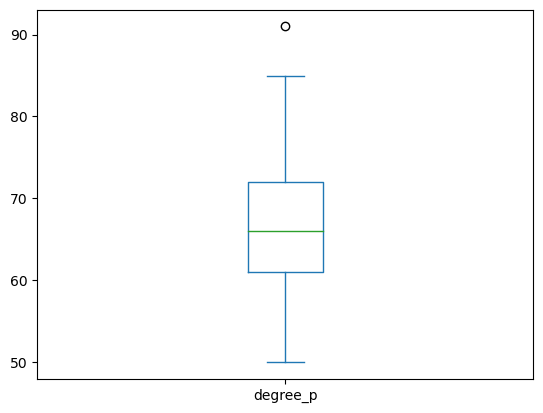

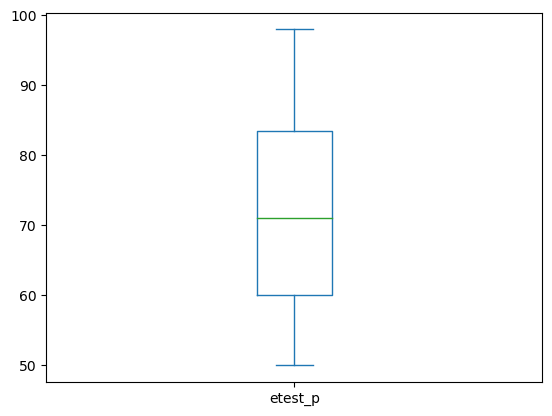

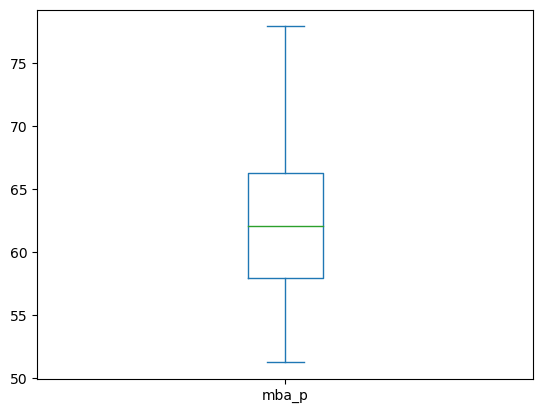

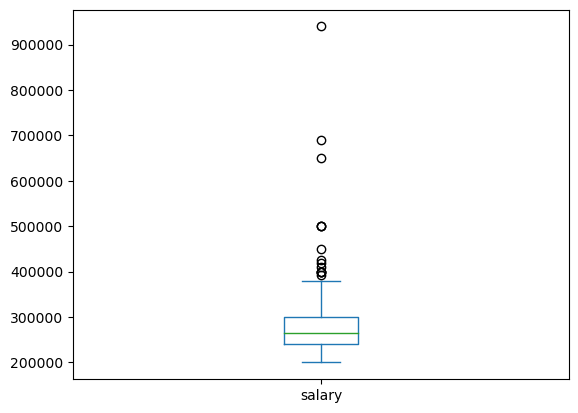

In [7]:
for i in df.select_dtypes(exclude='object').columns:
    df[i].plot.box()
    plt.show()

sl_no


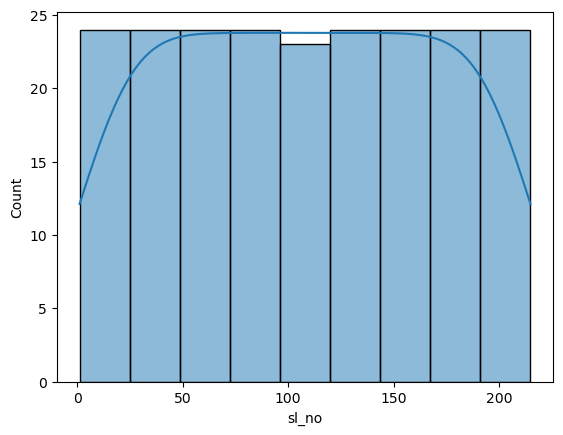

ssc_p


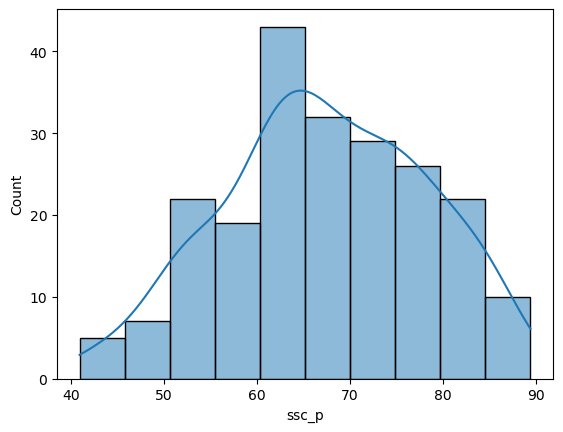

hsc_p


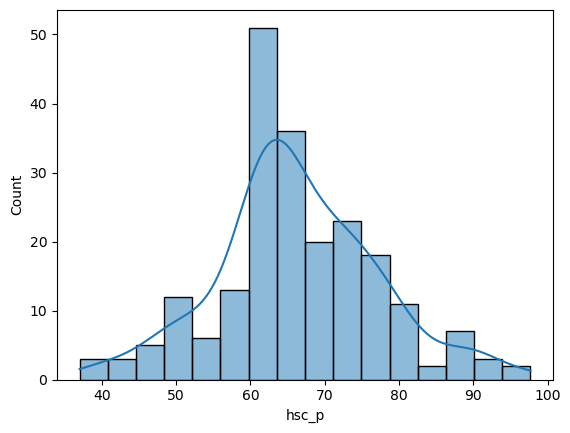

degree_p


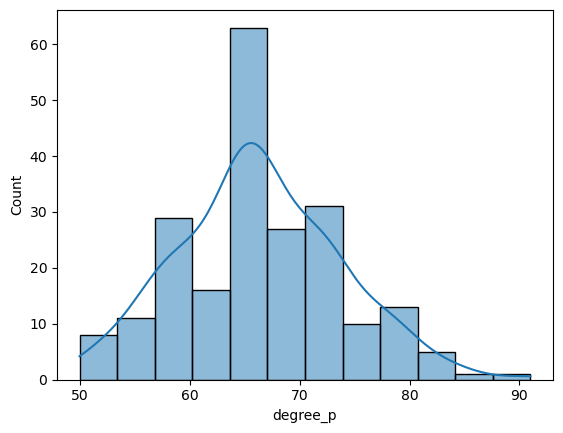

etest_p


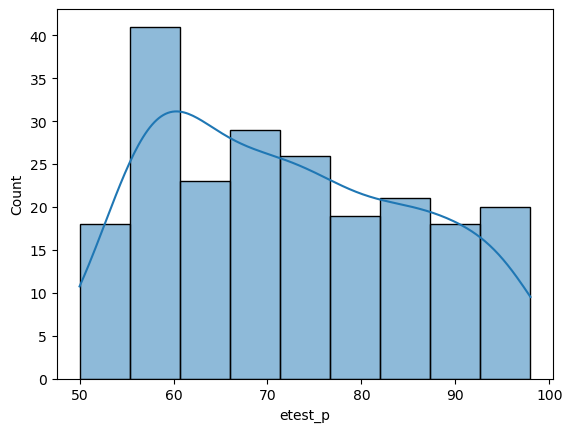

mba_p


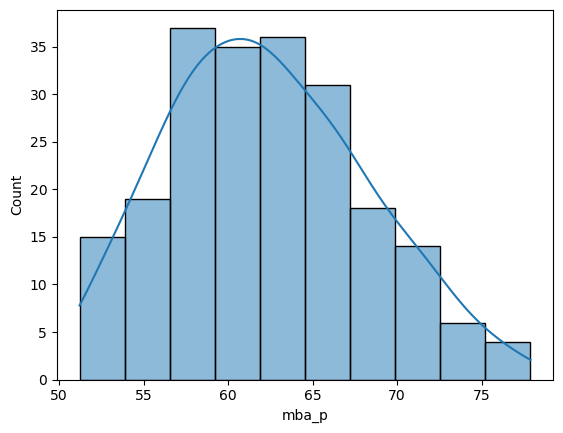

salary


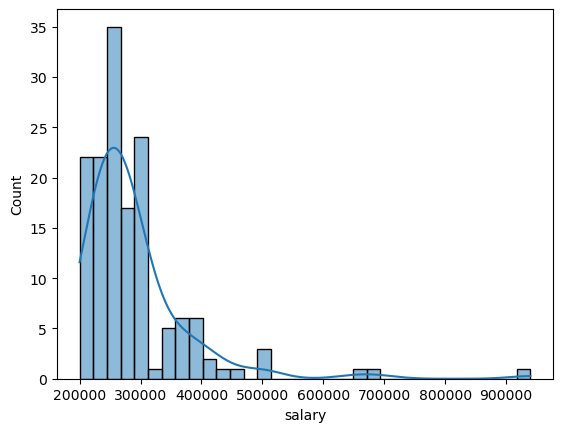

In [8]:
for i in df.select_dtypes(exclude='object').columns:
    print(i)
    sns.histplot(kde=True,data=df[i])
    plt.show()

gender


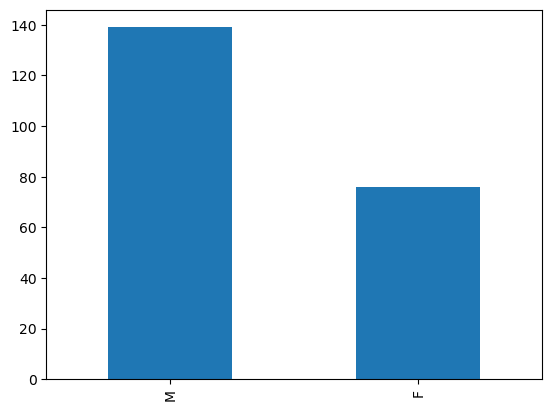

ssc_b


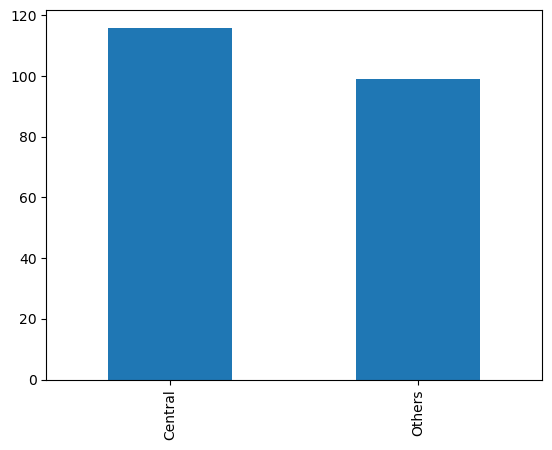

hsc_b


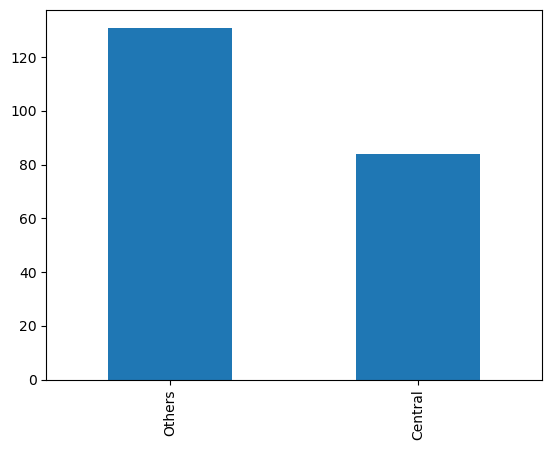

hsc_s


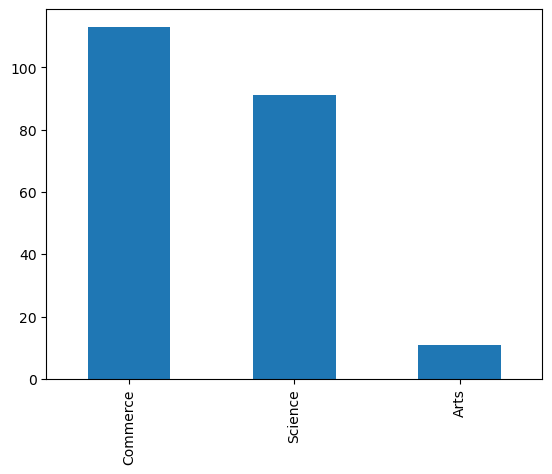

degree_t


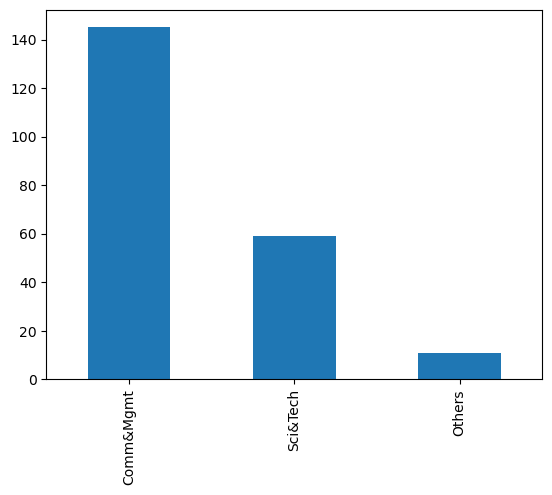

workex


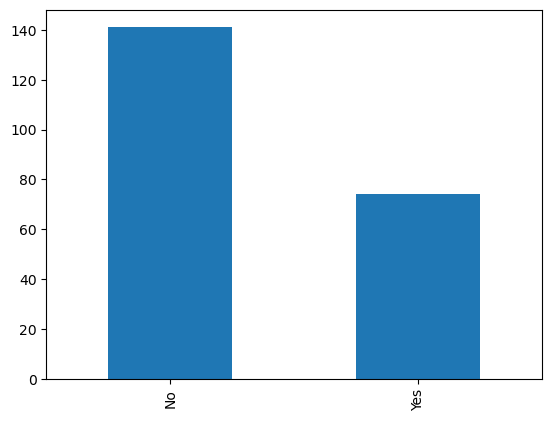

specialisation


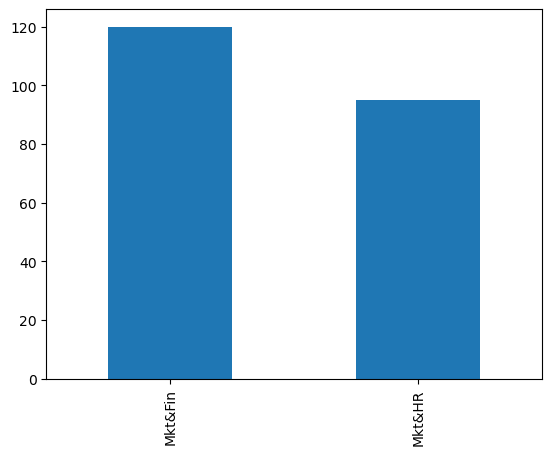

status


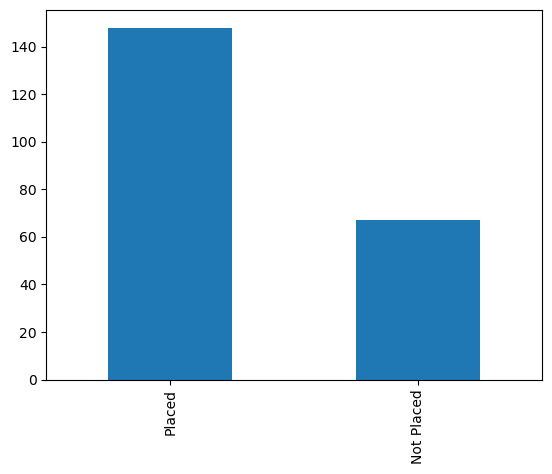

In [9]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    df[i].value_counts().plot.bar()
    plt.show()

In [10]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Feature Selection

In [11]:
X = df.drop('status',axis=1)
y = df['status']

In [12]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
one = OneHotEncoder()
ord = OrdinalEncoder()
impute = SimpleImputer(strategy='median')

In [13]:
X['salary']=impute.fit_transform(X[['salary']])

In [14]:
for i in X.select_dtypes(include='object').columns:
    X[i] = ord.fit_transform(X[[i]])

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [16]:
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectKBest
better = SelectKBest(chi2,k=2)
pd.DataFrame(better.fit_transform(X[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']],y),columns=better.get_feature_names_out())

,workex,specialisation
0,0.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
210,0.0,0.0
211,0.0,0.0
212,1.0,0.0
213,0.0,1.0


In [17]:
cat_col = ['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t']

In [18]:
df.drop(cat_col,axis=1,inplace=True)

In [19]:
X

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,270000.0
1,2,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,200000.0
2,3,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,250000.0
3,4,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,265000.0
4,5,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,400000.0
211,212,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,275000.0
212,213,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,295000.0
213,214,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,204000.0


In [20]:
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectKBest
better = SelectKBest(f_classif,k=3)
pd.DataFrame(better.fit_transform(X[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']],y),columns=better.get_feature_names_out())

,ssc_p,hsc_p,degree_p
0,67.00,91.00,58.00
1,79.33,78.33,77.48
2,65.00,68.00,64.00
3,56.00,52.00,52.00
4,85.80,73.60,73.30
...,...,...,...
210,80.60,82.00,77.60
211,58.00,60.00,72.00
212,67.00,67.00,73.00
213,74.00,66.00,58.00


In [21]:
num_col = ['etest_p','mba_p','salary']

In [22]:
df.drop(num_col,axis=1,inplace=True)

## Data Splitting

In [23]:
X = df.drop('status',axis=1)
y = df['status']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [25]:
y = le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import OrdinalEncoder,RobustScaler

In [29]:
cat_col = X.select_dtypes(include='object').columns
num_col = X.select_dtypes(exclude='object').columns

In [30]:
num_col

Index(['ssc_p', 'hsc_p', 'degree_p'], dtype='object')

In [31]:
cat_transformation = Pipeline(steps = [("Encoding",OneHotEncoder())])

In [32]:
num_transformation = Pipeline(steps=[('Scaler',RobustScaler())])

In [33]:
Preprocess = ColumnTransformer([('Step 1',cat_transformation,cat_col),
                  ('Step 2',num_transformation,num_col)])

In [34]:
mnb = Pipeline(steps=[('Preprocessing',Preprocess),
               ('Classification',MixedNB())])

In [35]:
mnb.fit(X_train,y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Step 1',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['workex', 'specialisation'], dtype='object')),
                                                 ('Step 2',
                                                  Pipeline(steps=[('Scaler',
                                                                   RobustScaler())]),
                                                  Index(['ssc_p', 'hsc_p', 'degree_p'], dtype='object'))])),
                ('Classification', MixedNB(alpha=0.5, var_smoothing=1e-09))])

In [36]:
y_pred = mnb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [38]:
accuracy_score(y_test,y_pred)

0.8148148148148148

In [39]:
confusion_matrix(y_test,y_pred)

array([[ 9,  5],
       [ 5, 35]], dtype=int64)

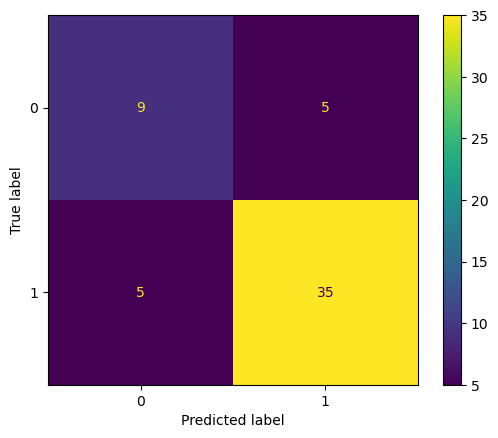

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn= Pipeline(steps=[('Preprocessing',Preprocess),
               ('Classification',KNeighborsClassifier())])

In [43]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8148148148148148

In [46]:
import pickle
with open('mixed_nb_campus_placement_pred.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)